In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

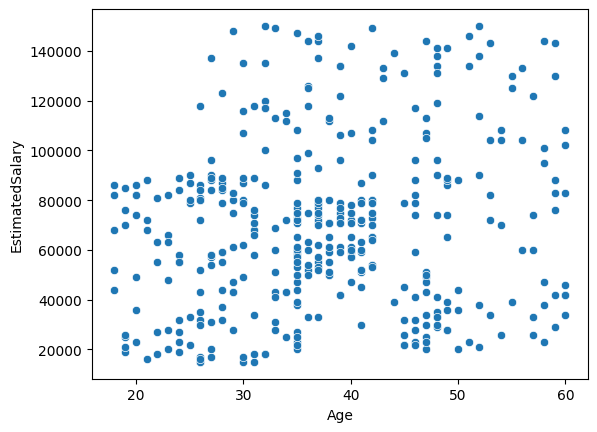

In [14]:
sns.scatterplot(x= df.iloc[:,0],y=df.iloc[:,1])

In [15]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

d:\SAURABH\spring 2024\DeepLearningProjects\customer_churn_prediction_using_ANN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 403ms/step - accuracy: 0.4731 - loss: 243.9619 - val_accuracy: 0.6000 - val_loss: 187.7870
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.6174 - loss: 125.7828 - val_accuracy: 0.6000 - val_loss: 21.4576
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4818 - loss: 67.5978 - val_accuracy: 0.4000 - val_loss: 22.9756
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5059 - loss: 57.0015 - val_accuracy: 0.6000 - val_loss: 199.4667
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5486 - loss: 166.7883 - val_accuracy: 0.6000 - val_loss: 96.5858
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5834 - loss: 65.6708 - val_accuracy: 0.4000 - val_loss: 33.0399
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4195 - loss: 31.9777 - val_accuracy: 0.6000 - val_loss: 9.3098
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5695 - loss: 22.2

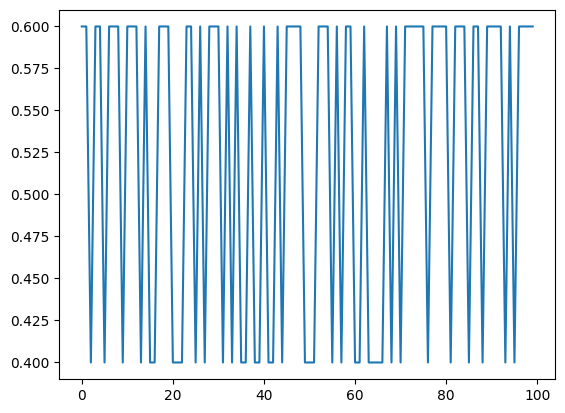

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [23]:
# if we see the plot the accuracy is oscillating betweern 40 and 60 percent, this is the problem if we dont scale the data
# so we will scale the data

# Applying scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

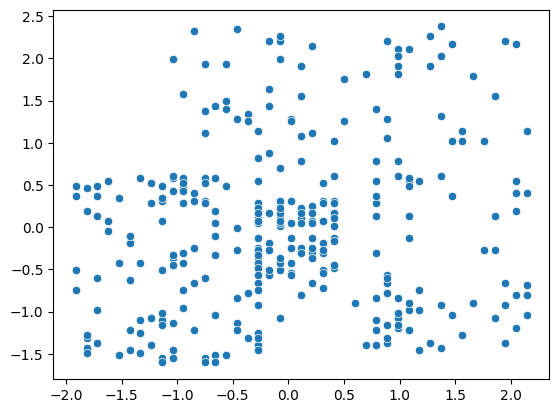

In [27]:
sns.scatterplot(x= X_train_scaled[:,0], y=X_train_scaled[:,1])

In [28]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


d:\SAURABH\spring 2024\DeepLearningProjects\customer_churn_prediction_using_ANN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5517 - loss: 0.6905 - val_accuracy: 0.7250 - val_loss: 0.6438
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7646 - loss: 0.6365 - val_accuracy: 0.7375 - val_loss: 0.5926
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8363 - loss: 0.5916 - val_accuracy: 0.7750 - val_loss: 0.5500
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8021 - loss: 0.5574 - val_accuracy: 0.7750 - val_loss: 0.5139
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8279 - loss: 0.5169 - val_accuracy: 0.7750 - val_loss: 0.4815
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8173 - loss: 0.4888 - val_accuracy: 0.7750 - val_loss: 0.4515
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8545 - loss: 0.4562 - val_accuracy: 0.7750 - val_loss: 0.4248
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8520 - loss: 0.4171 - val_accuracy: 0.7875 - val_l

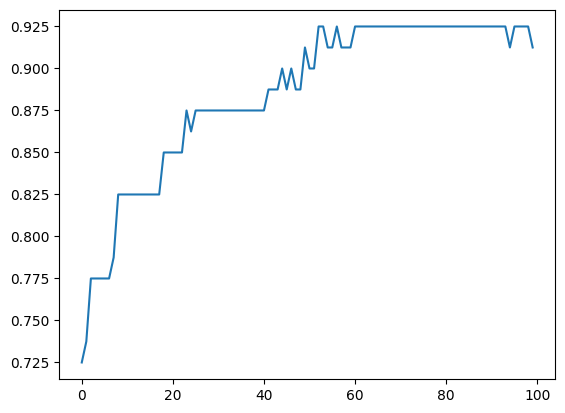

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [31]:
# we can see after scaling the data the accuracy is not oscillating and is increasing steadily
# it reached 90 percent accuracy in 100 epochs